In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
titanic_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/titanic-train.csv.txt')

In [20]:
titanic_data.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [4]:
titanic_data.PassengerId.count()

891

In [5]:
import seaborn as sns

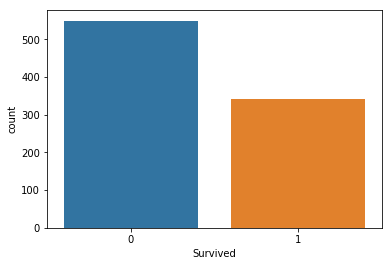

In [6]:
sns.countplot('Survived',data=titanic_data)

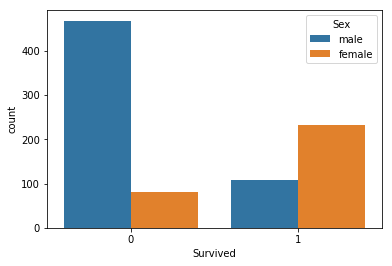

In [7]:
sns.countplot('Survived',hue='Sex',data=titanic_data)

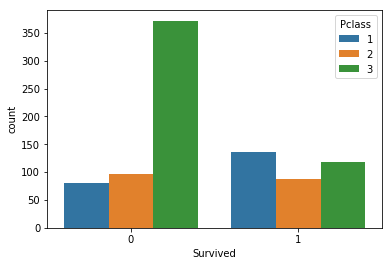

In [8]:
sns.countplot('Survived',hue='Pclass',data=titanic_data)

In [9]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


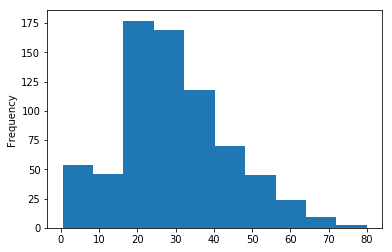

In [11]:
titanic_data['Age'].plot.hist()

In [12]:
titanic_data.corr()

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

In [13]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [14]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

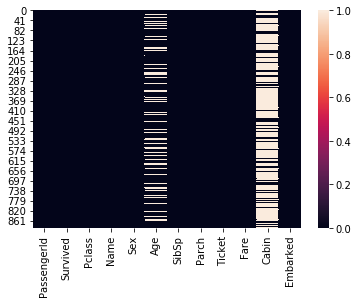

In [15]:
sns.heatmap(titanic_data.isnull())

In [21]:
titanic_data.drop(columns=['Cabin','Name','PassengerId','Ticket'],inplace=True)

In [22]:
titanic_data.dropna(inplace=True)

In [23]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Sex         712 non-null object
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Fare        712 non-null float64
Embarked    712 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 44.5+ KB


In [24]:
titanic_data.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le = LabelEncoder()

In [31]:
titanic_data.Sex = le.fit_transform(titanic_data.Sex)

In [34]:
titanic_data.head(3)

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2

In [33]:
titanic_data.Embarked = le.fit_transform(titanic_data.Embarked)

In [49]:
X = titanic_data.drop('Survived',axis=1)
y = titanic_data.Survived

In [50]:
X.head()

Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  22.0      1      0   7.2500         2
1       1    0  38.0      1      0  71.2833         0
2       3    0  26.0      0      0   7.9250         2
3       1    0  35.0      1      0  53.1000         2
4       3    1  35.0      0      0   8.0500         2

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

In [53]:
X_train.head()

Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
675       3    1  18.0      0      0   7.7750         2
276       3    0  45.0      0      0   7.7500         2
190       2    0  32.0      0      0  13.0000         2
44        3    0  19.0      0      0   7.8792         1
211       2    0  35.0      0      0  21.0000         2

In [54]:
y_train.head()

675    0
276    0
190    1
44     1
211    1
Name: Survived, dtype: int64

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
lr = LogisticRegression()

In [57]:
lr.fit(X_train,y_train)

C:\Users\ab522tx\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [58]:
y_pred = lr.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [64]:
confusion_matrix(y_test,y_pred)

array([[118,  12],
       [ 34,  50]], dtype=int64)

In [65]:
accuracy_score(y_test,y_pred)

0.7850467289719626

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
dtc = DecisionTreeClassifier()

In [68]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [69]:
y_pred2 = dtc.predict(X_test)

In [70]:
confusion_matrix(y_test,y_pred2)

array([[109,  21],
       [ 23,  61]], dtype=int64)

In [71]:
accuracy_score(y_test,y_pred2)

0.794392523364486

In [72]:
from sklearn.svm import SVC

In [73]:
svc = SVC()

In [74]:
svc.fit(X_train,y_train)

C:\Users\ab522tx\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [75]:
y_pred3 = svc.predict(X_test)

In [76]:
confusion_matrix(y_test,y_pred3)

array([[103,  27],
       [ 47,  37]], dtype=int64)

In [77]:
accuracy_score(y_test,y_pred3)

0.6542056074766355